# Equations of State from Lattice Gas Models

## Motivation

The finite volume lattice gas model can be used to estimate entropies of mixing.  In these notes we will address how different lattice gas models can be used to derive equations of state.

## Learning goals

After these notes, students should be able to:
1. Use the Sterling approximation for natural logarithms of a factorial
2. Derive the ideal gas law from no-volume lattice gas model
3. Derive the equation of state for a fintie volume lattice gas model

## Coding Concepts

The following coding concepts are used to illustrate aspects of this lesson:

1. Variables
2. Functions
3. Arrays
4. Numpy
5. Plotting with matplotlib

## Introduction



## Ideal Gas Lattice Gas

We have previously seen the finite volume lattice gas.  The ideal gas lattice gas is even easier.  The number of ways of arranging $N$ gas particles in $M$ lattice sites ($M>N$) is
\begin{equation}
W = \frac{M^N}{N!}.
\end{equation}
This is because every gas particle can be place in any of the lattice sites.  The $N!$ in the denominator corrects for the indistinguishable nature of these particles.  

Thus, the entropy of an ideal gas with $N$ particles in  $M$ lattice sites is
\begin{eqnarray}
S &=& k_B \ln\left( \frac{M^N}{N!}\right) \\
&=& Nk_B\ln M - k_B\ln N!
\end{eqnarray}

### Example 1: Entropy of Lattice Gas

Compute the molar entropy of a lattice gas with 5 particles and 16 lattice sites for the (a) ideal gas model and (b) finite gas model.

(a) Ideal gas model:
For this model the entropy is given as the formula above
\begin{eqnarray}
\bar{S} &=& NR\ln M - R\ln N! \\
&=& 5R\ln 16 - R\ln 5! \\
&=& 8.314(5\ln16 - ln120) \\
&=& 75.45 \quad J\cdot K^{-1}\cdot mol^{-1}
\end{eqnarray}

In [3]:
import numpy as np
from scipy.special import factorial
8.314*(5*np.log(16)-np.log(factorial(5)))

75.45330683401777

(b) Finite gas model: for this model the entropy is given as
\begin{eqnarray}
\bar{S} &=& R\ln\left(\frac{M!}{(M-N)!N!}\right) \\
&=& R\ln\left(\frac{16!}{11!5!}\right) \\
&=& 69.69 \quad J\cdot K^{-1}\cdot mol^{-1}
\end{eqnarray}

In [4]:
import numpy as np
from scipy.special import factorial
8.314*np.log(factorial(16)/(factorial(11)*factorial(5)))

69.6884511418693

### Equation of State for an Ideal Lattice Gas

We can derive the equation of state for an ideal gas lattice gas model using the relationship
\begin{equation}
p = T \left( \frac{\partial S}{\partial V}\right)_N.
\end{equation}
We will see where this relationship comes from during the section on classical Thermodynamics.  

In order to use this relationship, we need to have an equation for $S$ in terms of the volume of the system, $V$.  For this, we recognize that, for uniformly size grids/lattices, the volume of the system is proportional to the number of lattice sites
\begin{equation}
V \propto M.
\end{equation}
The proportionality constant is the volume of each lattice site which we will denote $v$.  This yields
\begin{equation}
V = vM
\end{equation}
or
\begin{equation}
M = \frac{V}{v}
\end{equation}

Subbing this into the ideal gas lattice gas entropy equation yields
\begin{eqnarray}
S &=& Nk_B\ln \frac{V}{v} - k_B\ln N! \\
 &=& Nk_B\ln V -  Nk_B\ln v- k_B\ln N! \\
\end{eqnarray}

Now differentiating the above equation with respect to $V$ and multiplying by $T$ yields
\begin{eqnarray}
p &=& T \left( \frac{\partial S}{\partial V}\right)_N \\
&=& T \left( \frac{\partial( Nk_B\ln V -  Nk_B\ln v- k_B\ln N!)}{\partial V}\right)_N\\
&=& T \cdot Nk_B\frac{1}{V} \\
&=&  \frac{Nk_BT}{V} \\
\end{eqnarray}

## Finite Volume Lattice Gas

For a fintie volume lattice gas, the number of ways of arranging $N$ gas particles in $M$ lattice sites ($M>N$) is
\begin{equation}
W = \frac{M!}{(M-N)!N!} = _MC_N.
\end{equation}
 
Thus, the entropy of an finite volume gas with $N$ particles in $M$ lattice sites is
\begin{eqnarray}
S &=& k_B \ln\left( \frac{M!}{(M-N)!N!} \right) \\
&=& k_B\ln M! - k_B\ln(M-N)! - k_B\ln N!
\end{eqnarray}

### The Sterling Approximation

A common approximation that comes up is Statistical Mechanics is the Sterling Approximation.  This approximates the natural log of a factorial as
\begin{equation}
\ln N! = N\ln N - N
\end{equation}

Let's see how good of an approximation this is

<ipython-input-19-57d9286cb562>:11: RuntimeWarning: divide by zero encountered in log
  return N*np.log(N)-N
<ipython-input-19-57d9286cb562>:11: RuntimeWarning: invalid value encountered in multiply
  return N*np.log(N)-N
<ipython-input-19-57d9286cb562>:11: RuntimeWarning: divide by zero encountered in log
  return N*np.log(N)-N
<ipython-input-19-57d9286cb562>:11: RuntimeWarning: invalid value encountered in multiply
  return N*np.log(N)-N
<ipython-input-19-57d9286cb562>:25: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(N,np.abs(ln_N_factorial(N)-sterling_N(N))/ln_N_factorial(N)*100,lw=2,label="% error",color='C3')


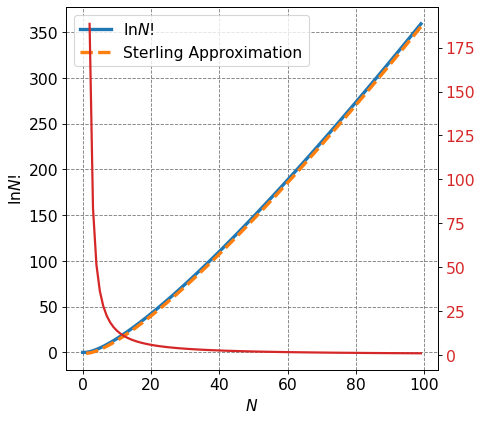

In [19]:
# import libraries
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline
# setup problem
N = np.arange(0,100,1)
def ln_N_factorial(N):
    return np.log(factorial(N))
def sterling_N(N):
    return N*np.log(N)-N
# setup plot 
fontsize=14
fig = plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$N$",size=fontsize)
ax.set_ylabel("$\ln N!$",size=fontsize)
ax.plot(N,ln_N_factorial(N),lw=3,label="$\ln N!$")
ax.plot(N,sterling_N(N),'--',lw=3,label="Sterling Approximation")
ax2.set_ylabel('% Error', color='C3',fontsize=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
plt.legend(fontsize=fontsize)
ax2 = ax.twinx()
ax2.plot(N,np.abs(ln_N_factorial(N)-sterling_N(N))/ln_N_factorial(N)*100,lw=2,label="% error",color='C3')
ax2.tick_params(axis='y', labelcolor='C3',labelsize=fontsize)

From the above plot, specifically from the rapid decay of the percent error with increasing $N$, we can see that the Sterling approximation is a good approximation in particular for large $N$.

### Equation of State for a Finite Volume Lattice Gas

We can derive the equation of state for an ideal gas lattice gas model using the relationship
\begin{equation}
p = T \left( \frac{\partial S}{\partial V}\right)_N.
\end{equation}
We will see where this relationship comes from during the section on classical Thermodynamics.  

To derive an expression for $S$ in terms of $V$ for a finite volume lattice gas, we will start be employing the Sterling approximation to the equation for $S$
\begin{eqnarray}
S &=& k_B\ln M! - k_B\ln(M-N)! - k_B\ln N! \\
&=& k_B \left( M\ln M - M - (M-N)\ln(M-N) + (M-N) - N\ln N + N\right) \\
&=& k_B \left( M\ln M - M\ln(M-N) + N\ln(M-N) - N\ln N \right)
\end{eqnarray} 
Now substituting that $M=\frac{V}{v}$ yields
\begin{eqnarray}
S &=& k_B \left( \frac{V}{v}\ln \frac{V}{v} - \frac{V}{v}\ln(\frac{V}{v}-N) + N\ln(\frac{V}{v}-N) - N\ln N \right)\\
&=& k_B \left( \frac{V}{v}\ln V - \frac{V}{v}\ln v - \frac{V}{v}\ln(\frac{V}{v}-N) + N\ln(\frac{V}{v}-N) - N\ln N \right)
\end{eqnarray} 

Now differentiating the above equation with respect to $V$ and multiplying by $T$ yields
\begin{eqnarray}
p &=& T \left( \frac{\partial S}{\partial V}\right)_N \\
&=& k_B T \left( \frac{1}{v}\ln V + \frac{V}{v}\frac{1}{V} - \frac{1}{v}\ln v - \frac{1}{v}\ln(\frac{V}{v}-N) - \frac{V}{v}\frac{1}{\frac{V}{v}-N}\frac{1}{v} + N\frac{1}{\frac{V}{v}-N}\frac{1}{v} \right)\\
&=& \frac{k_B T}{v} \left( \ln V + 1 - \ln v - \ln(\frac{V}{v}-N) - \frac{V}{v}\frac{1}{\frac{V}{v}-N} + N\frac{1}{\frac{V}{v}-N} \right) \\
&=& \frac{k_B T}{v} \left( \ln \frac{V}{v} + 1 - \ln(\frac{V}{v}-N) - \frac{V}{V-vN} + \frac{vN}{V-vN} \right) \\
&=& \frac{k_B T}{v} \left( \ln M + 1 - \ln(M-N) - \frac{V}{V-vN} + \frac{vN}{V-vN} \right)
\end{eqnarray}
At this point we need to make another approximation/assumption in order to simplify further.  If we assume that the gas is dilute then the number of lattice sites $M$ will be much much larger than the number of gas particles $N$.  This has the implication that $M-N \approx M$ and $\frac{V}{V-vN}\approx 1$.  Applying this assumption yields
\begin{eqnarray}
p &=& \frac{k_B T}{v} \left( \ln M + 1 - \ln M - 1 + \frac{vN}{V-vN} \right) \\
&=& \frac{Nk_B T}{V-vN}
\end{eqnarray}
which is a somewhat standard correction to the ideal gas law for finite volume particles.